In [3]:
from distributed import Client
from os import cpu_count
client = Client(n_workers=cpu_count())

distributed.diskutils - INFO - Found stale lock file and directory '/home/hyperchain/wxt/stock_quant/dask-worker-space/worker-wfbon3cx', purging
distributed.diskutils - INFO - Found stale lock file and directory '/home/hyperchain/wxt/stock_quant/dask-worker-space/worker-62tfob9r', purging
distributed.diskutils - INFO - Found stale lock file and directory '/home/hyperchain/wxt/stock_quant/dask-worker-space/worker-tt0ow50i', purging
distributed.diskutils - INFO - Found stale lock file and directory '/home/hyperchain/wxt/stock_quant/dask-worker-space/worker-_rq4j1d_', purging
distributed.diskutils - INFO - Found stale lock file and directory '/home/hyperchain/wxt/stock_quant/dask-worker-space/worker-ggh_4zvl', purging
distributed.diskutils - INFO - Found stale lock file and directory '/home/hyperchain/wxt/stock_quant/dask-worker-space/worker-_od_gz5g', purging
distributed.diskutils - INFO - Found stale lock file and directory '/home/hyperchain/wxt/stock_quant/dask-worker-space/worker-o41_

In [4]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [5]:
%%time
# 这需要三秒钟才能运行，
# 因为我们一个接一个地按顺序调用每个函数

x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: user 266 ms, sys: 42 ms, total: 308 ms
Wall time: 3 s


In [6]:
from dask import delayed

In [7]:
%%time
# 这会立即运行，它所做的只是构建一个图

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

CPU times: user 942 µs, sys: 873 µs, total: 1.82 ms
Wall time: 1.74 ms


In [8]:
%%time
# 这里才事实上地使用本地线程池运行我们的计算 

z.compute()

CPU times: user 328 ms, sys: 87 ms, total: 415 ms
Wall time: 2.25 s


5

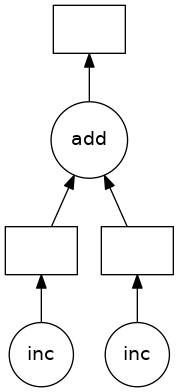

In [9]:
z.visualize()

In [9]:
z

Delayed('add-fd8e93ab-4e62-417e-be6f-8a627a4db4e8')

In [18]:
data = [1, 2, 3, 4, 5, 6, 7, 8]


In [19]:
result = []
for x in data:
    y = inc(x)
    result.append(y)

total = sum(result)

In [20]:
total

44

In [21]:
from functools import reduce
delayed_data = [delayed(inc)(x) for x in data]
total = reduce(delayed(add), delayed_data)
total.compute()

44

In [14]:
def double(x):
    sleep(1)
    return 2 * x

def is_even(x):
    return not x % 2

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [15]:
results = []
for x in data:
    if is_even(x):
        y = double(x)
    else:
        y = inc(x)
    results.append(y)
    
total = sum(results)
print(total)


90


In [1]:
import numpy as np
import pandas as pd
import dask.dataframe as dd

index = pd.date_range("2021-09-01", periods=2400, freq="1H")
df = pd.DataFrame({"a": np.arange(2400), "b": list("abcaddbe" * 300)}, index=index)

ddf = dd.from_pandas(df, npartitions=10)
# print(ddf.head())

print(ddf.divisions)

(Timestamp('2021-09-01 00:00:00', freq='H'), Timestamp('2021-09-11 00:00:00', freq='H'), Timestamp('2021-09-21 00:00:00', freq='H'), Timestamp('2021-10-01 00:00:00', freq='H'), Timestamp('2021-10-11 00:00:00', freq='H'), Timestamp('2021-10-21 00:00:00', freq='H'), Timestamp('2021-10-31 00:00:00', freq='H'), Timestamp('2021-11-10 00:00:00', freq='H'), Timestamp('2021-11-20 00:00:00', freq='H'), Timestamp('2021-11-30 00:00:00', freq='H'), Timestamp('2021-12-09 23:00:00', freq='H'))
